In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Metric Comparison on NLOS-Causing Material

In [2]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,material,encoded_material,error
0,-0.211129,0.168903,145.678574,10.307022,132.250000,12.904884,215.300003,11.049919,5.009119,151.291672,10.978348,5.037270,cardboard,1,-0.044354
1,-0.197054,0.206438,134.321426,10.824654,131.250000,12.686867,192.000000,11.397888,5.027886,196.916672,9.907471,5.037270,cardboard,1,-0.030278
2,-0.197054,0.206438,134.321426,10.824654,115.535713,11.384682,236.149994,9.844360,5.065420,247.300003,10.009239,5.074803,cardboard,1,-0.030278
3,-0.248663,0.206438,104.107140,11.064209,123.500000,12.628738,236.149994,9.844360,5.065420,247.300003,10.009239,5.074803,cardboard,1,-0.081888
4,-0.182979,0.206438,113.250000,10.954155,144.916672,12.631165,185.000000,10.330307,5.027886,140.041672,10.649246,5.074803,cardboard,1,-0.016203


In [19]:
# split to subsets
cardboard_df = df[df['material'] == 'cardboard']
foam_df = df[df['material'] == 'foam']
metal_df = df[df['material'] == 'metal']
plastic_df = df[df['material'] == 'plastic']
wooden_cabinet_df = df[df['material'] == 'wooden-cabinet']
wooden_shelf_df = df[df['material'] == 'wooden-shelf']

In [20]:
datasets = [cardboard_df, foam_df, metal_df, plastic_df, wooden_cabinet_df, wooden_shelf_df]

# Names or labels for each dataset
dataset_names = ['Cardboard', 'Foam', 'Metal', 'Plastic', 'Wooden Cabinet', 'Wooden Shelf']

In [22]:
def comparison_plot(col_name):
    # Create subplots for each dataset
    fig, axs = plt.subplots(2, 3, figsize=(10, 5))  # 1 rows, 6 columns

    # Flatten the 3x2 array of subplots to simplify indexing
    axs = axs.flatten()

    # Iterate through each dataset and plot the histogram in individual subplots using Seaborn
    for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
        sns.histplot(data=dataset, x=col_name, bins=30, ax=axs[i], kde=True, edgecolor='white')
        axs[i].set_title(name)
        axs[i].set_xlabel('')  # Remove overall x-label   # Remove x-axis labels
        axs[i].set_ylabel('')

        # Calculate mean and plot a vertical line at the mean value
        mean_value = dataset[col_name].mean()
        axs[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        axs[i].legend()  # Show the mean value in the legend

    # Hide inner x-axis labels and ticks
    # for ax in axs.flat:
    #    ax.label_outer()

    # Add a single x-label at the bottom center
    fig.text(0.5, 0.004, col_name, ha='center', va='center')
    fig.text(0.003, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

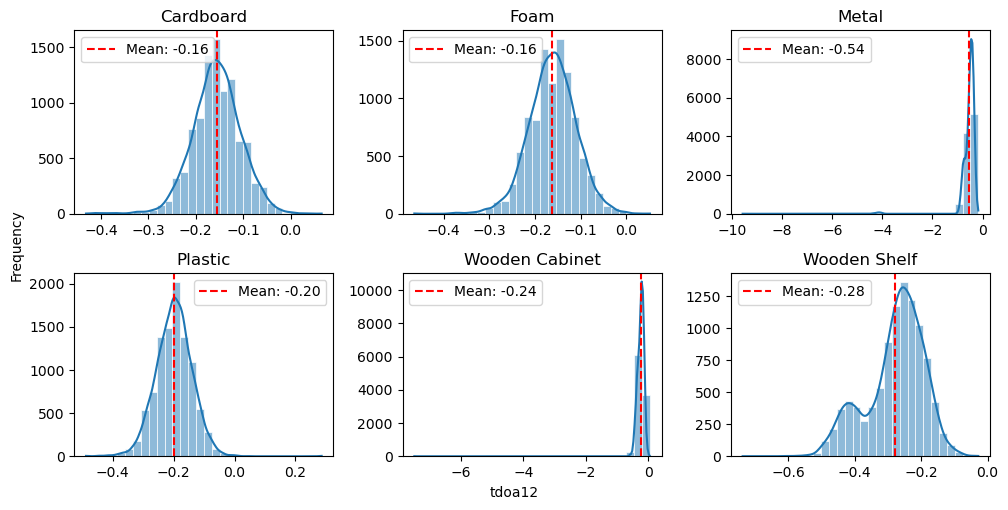

In [23]:
comparison_plot(col_name='tdoa12')

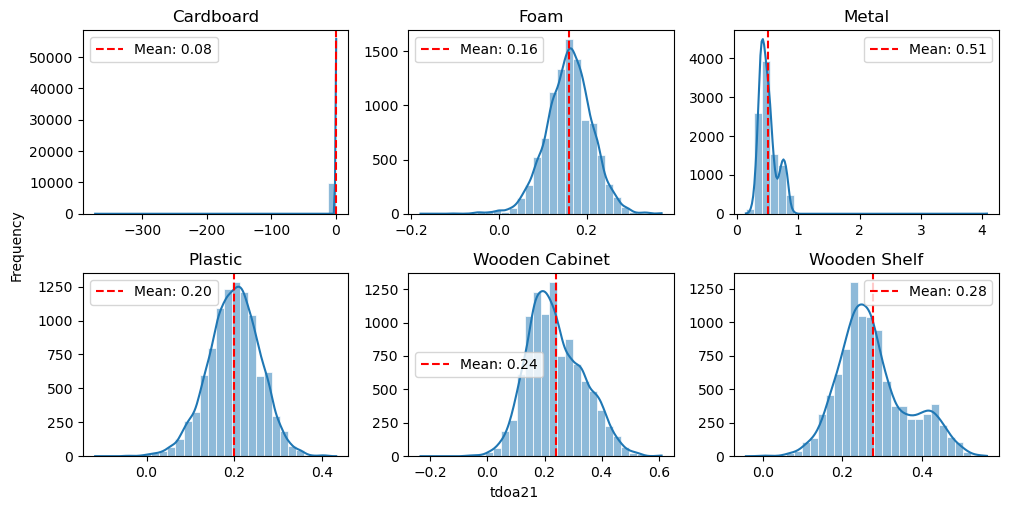

In [24]:
comparison_plot(col_name='tdoa21')

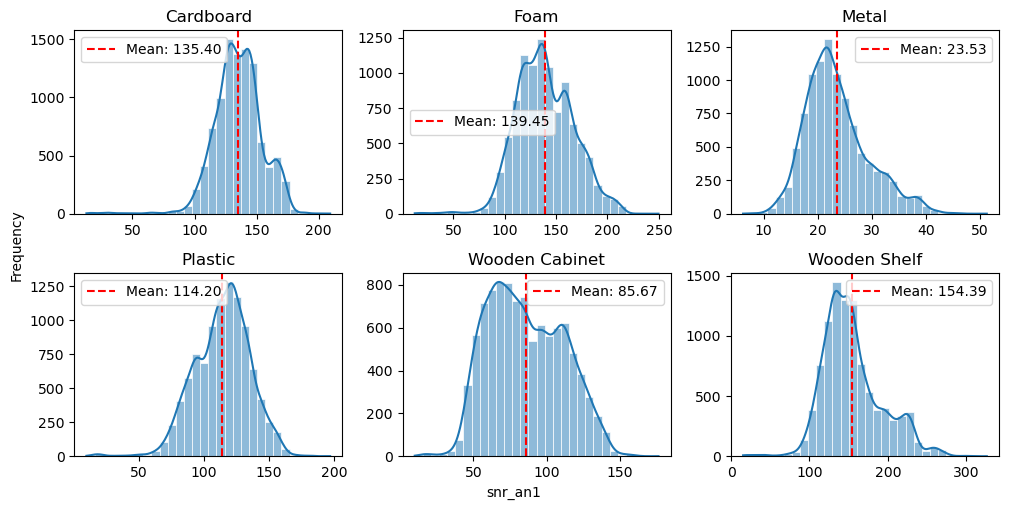

In [25]:
comparison_plot(col_name='snr_an1')

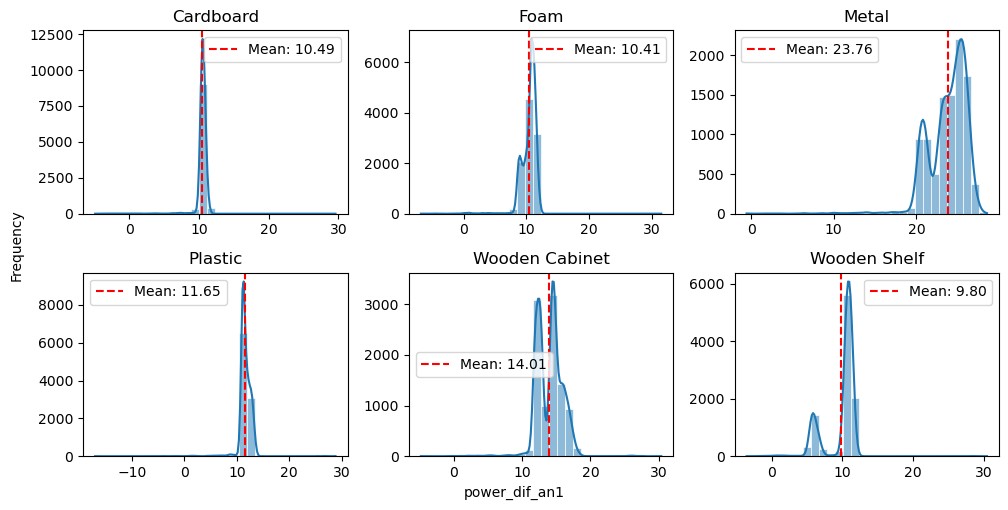

In [26]:
comparison_plot(col_name='power_dif_an1')

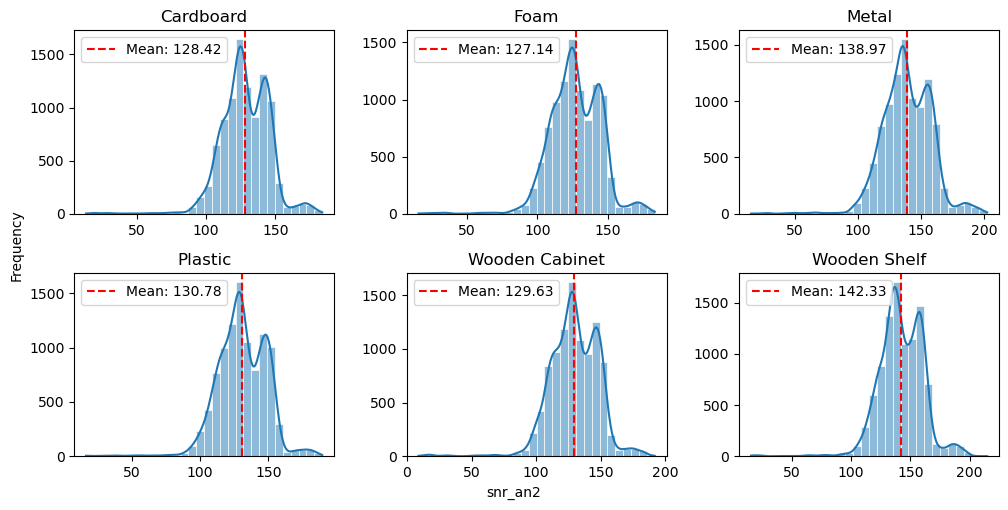

In [27]:
comparison_plot(col_name='snr_an2')

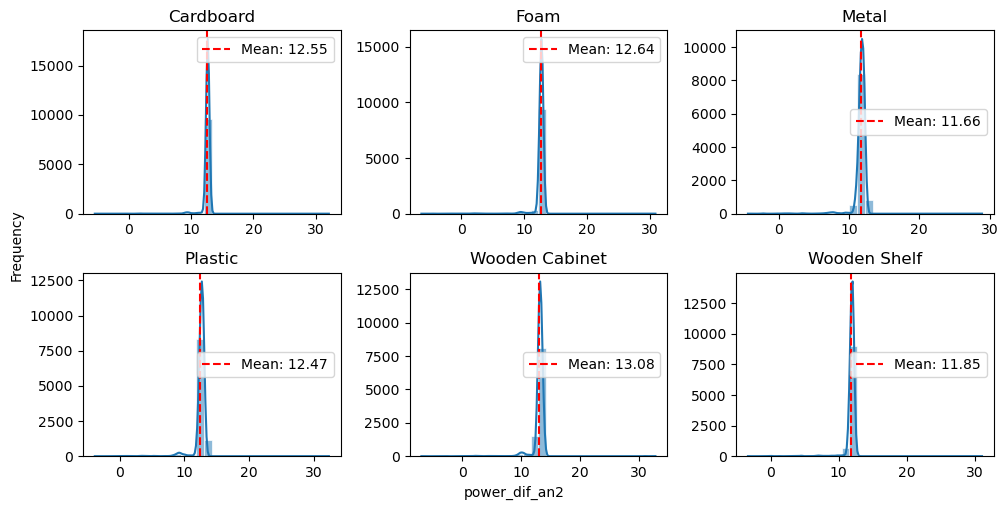

In [28]:
comparison_plot(col_name='power_dif_an2')

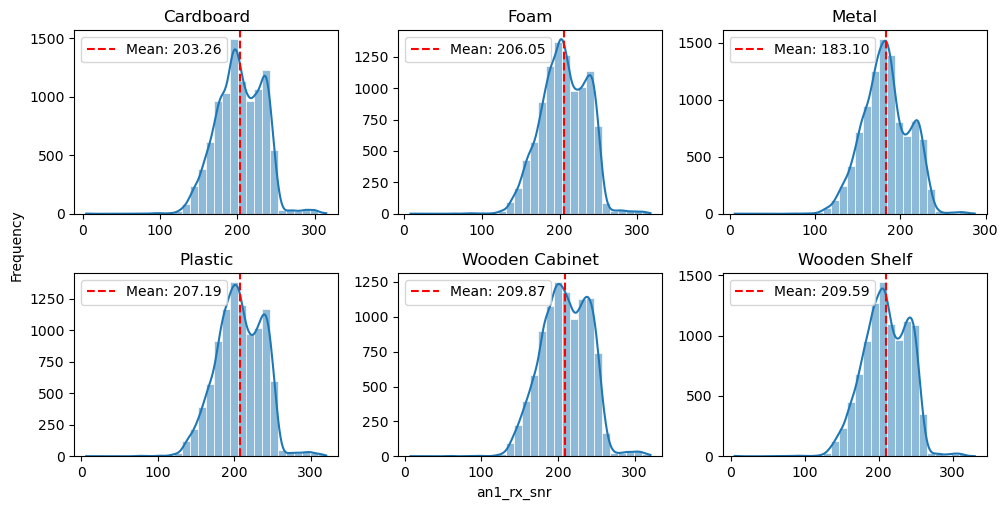

In [29]:
comparison_plot(col_name='an1_rx_snr')

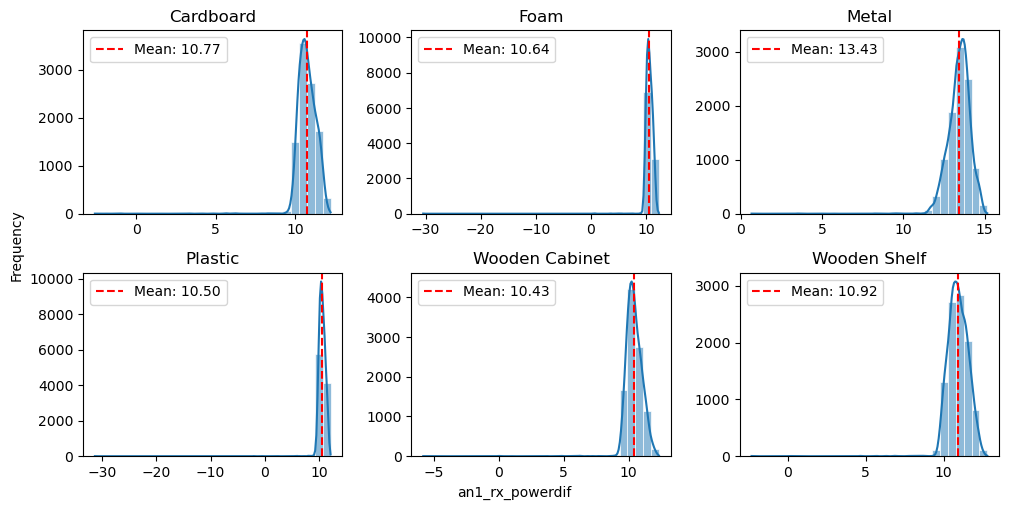

In [30]:
comparison_plot(col_name='an1_rx_powerdif')

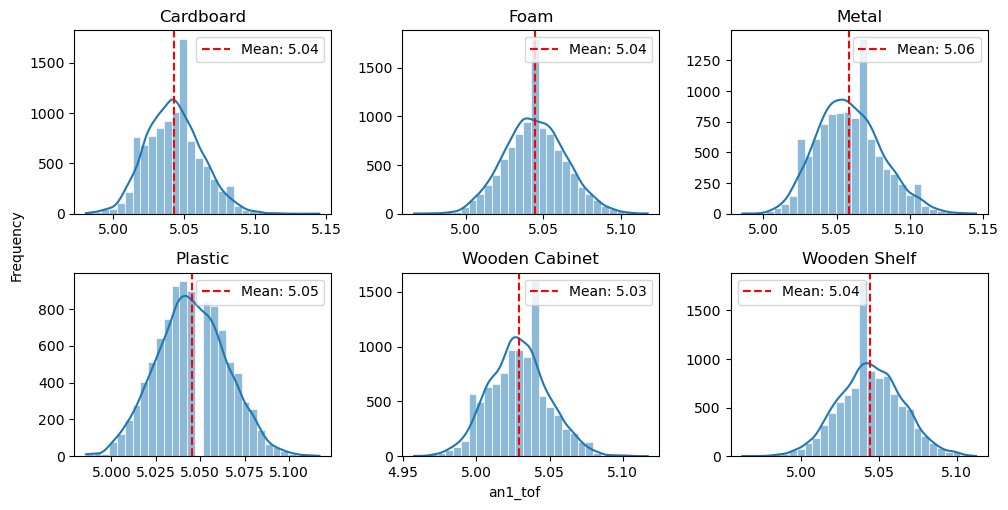

In [31]:
comparison_plot(col_name='an1_tof')

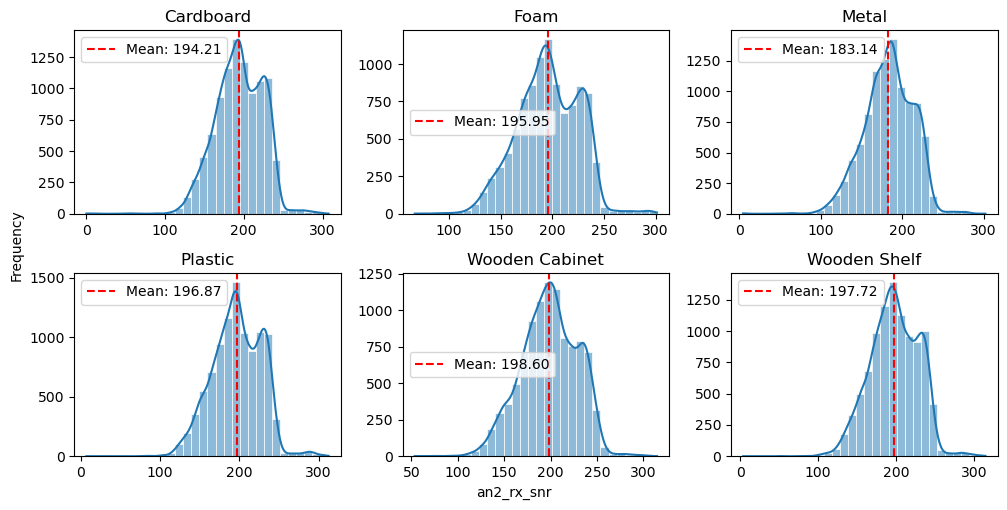

In [32]:
comparison_plot(col_name='an2_rx_snr')

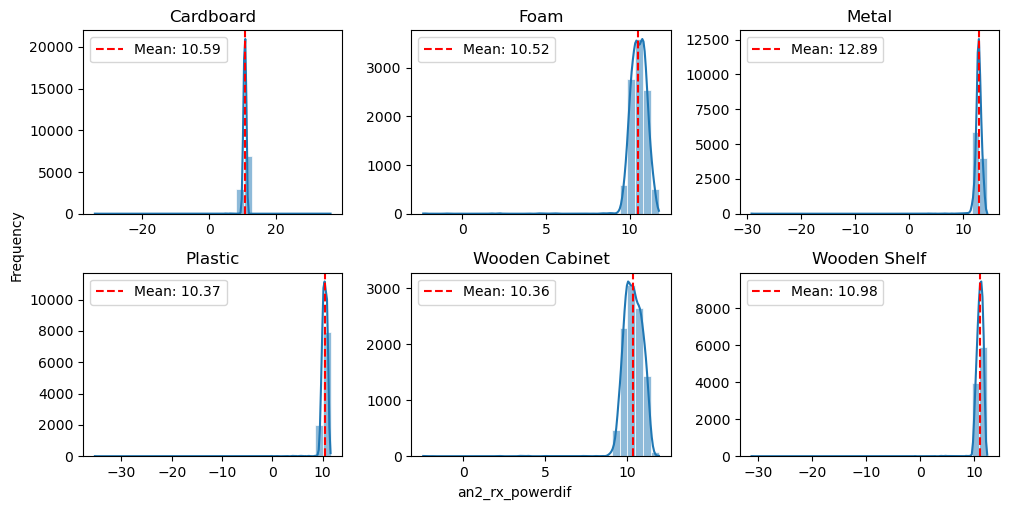

In [33]:
comparison_plot(col_name='an2_rx_powerdif')

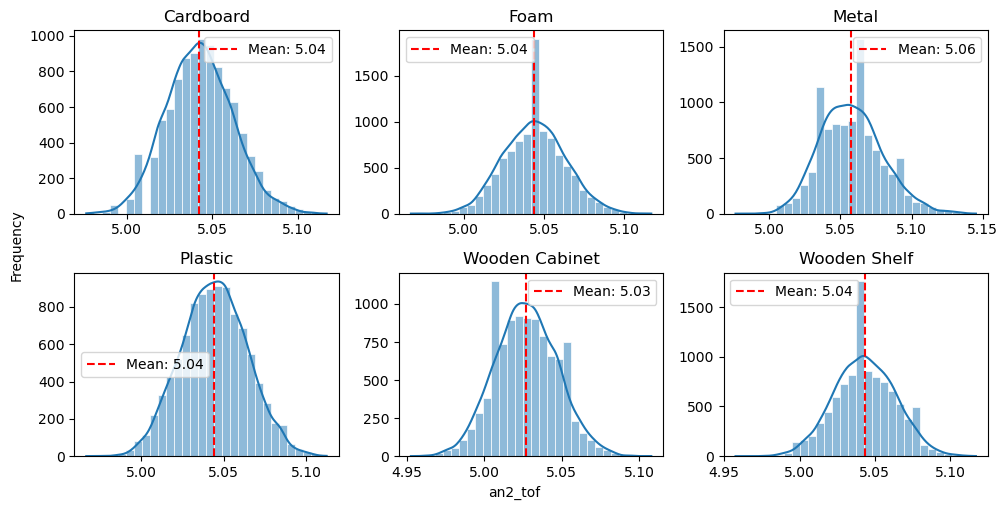

In [34]:
comparison_plot(col_name='an2_tof')

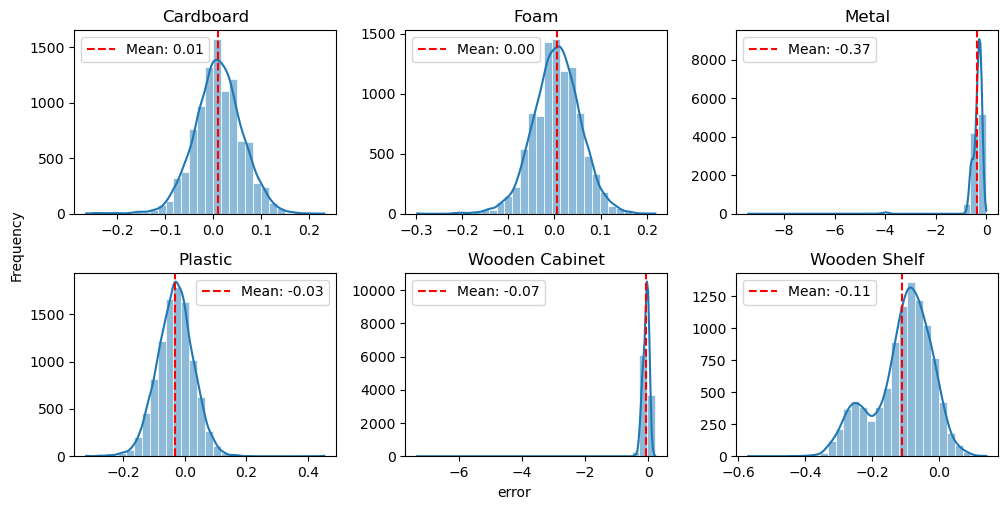

In [35]:
comparison_plot(col_name='error')